https://nightly.cs.washington.edu/reports/eggcc/1732198012:nightly:main:f0c4762a1d/data/profile.json

In [24]:
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import generate_test_case_line_counts

In [85]:
matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "STIXGeneral"
plt.rcParams["font.size"] = 20

transparency = 0.2
size = 100

In [86]:
data = pd.DataFrame(json.load(open("profile.json")))

In [87]:
line_counts = generate_test_case_line_counts.main("../benchmarks/passing/")

In [88]:
data["line_count"] = data.apply(lambda row: line_counts[row.benchmark], axis=1)

In [89]:
data[data["line_count"] >= 1000]

,runMethod,benchmark,cycles,metadata,eggccCompileTimeSecs,llvmCompileTimeSecs,line_count
531,llvm-O0-O0,raytrace,"[68891102, 69920020, 67226070, 68894476, 67490...","{'looped': False, 'path': 'benchmarks/passing/...",0.018997,0.740442,2506
532,llvm-O1-O0,raytrace,"[193923210, 60839110, 56383226, 56171536, 5792...","{'looped': False, 'path': 'benchmarks/passing/...",0.021151,1.110717,2506
533,llvm-O2-O0,raytrace,"[55715690, 55436910, 55216058, 55532696, 54526...","{'looped': False, 'path': 'benchmarks/passing/...",0.019356,1.176540,2506
534,llvm-O3-O0,raytrace,"[55465002, 56238628, 55012004, 55270948, 54946...","{'looped': False, 'path': 'benchmarks/passing/...",0.020348,1.362219,2506
535,llvm-O3-O3,raytrace,"[52263320, 52187136, 53716602, 52615012, 52344...","{'looped': False, 'path': 'benchmarks/passing/...",0.020688,2.215354,2506
536,llvm-eggcc-O0-O0,raytrace,"[68311792, 67484156, 67607238, 68273752, 67693...","{'looped': False, 'path': 'benchmarks/passing/...",265.542266,0.551952,2506
537,llvm-eggcc-O3-O0,raytrace,"[63353790, 57205184, 56021018, 57646504, 59172...","{'looped': False, 'path': 'benchmarks/passing/...",266.265700,0.871962,2506
538,llvm-eggcc-sequential-O0-O0,raytrace,"[63397776, 63581340, 62977226, 63502844, 63307...","{'looped': False, 'path': 'benchmarks/passing/...",1231.744178,0.517204,2506
539,rvsdg-round-trip-to-executable,raytrace,"[202538664, 78708132, 74920018, 69657904, 6998...","{'looped': False, 'path': 'benchmarks/passing/...",0.092199,0.806951,2506


In [90]:
runMethod = "llvm-eggcc-O3-O0"
data = data[data["runMethod"] == runMethod]

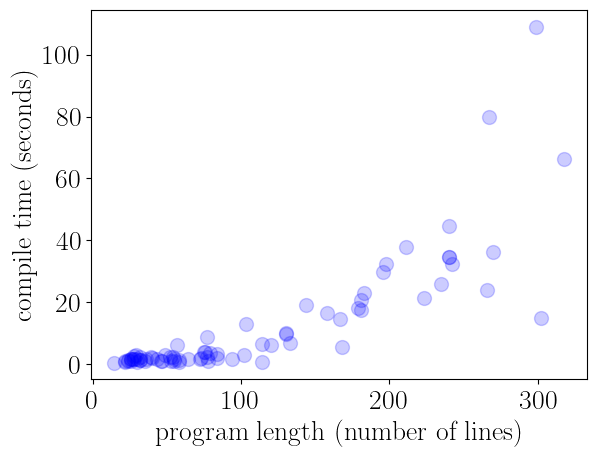

In [94]:
# remove outlier
data = data[data["line_count"] < 1000]

plt.xlabel("program length (number of lines)")
plt.ylabel("compile time (seconds)")

# passing
plt.scatter(
    data["line_count"],
    data["eggccCompileTimeSecs"],
    c="blue",
    s=size,
    alpha=transparency,
)

# plt.xlim(0, 350)
# plt.ylim(0, 140)
